# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

##### **¡Tómate tiempo para investigar y leer mucho!**

----------------------------------------------------------------------------------------------------------------------
### Índice
### * **Parte A** - Exploración de Datos.
Buscare realizar un análisis exploratorio de datos. En el transcurso de este, iré respondiendo preguntas sobre la serie temporal.
* Que tamaño tiene la serie?
* Hay datos faltantes?
* Tiene valores atípicos? 
* Tengo que conseguir información adicional para explicarlos?
* De acuerdo al análisis de la serie Illia y pago en Efectivo, su tendencia me dice que creció o decreció con el tiempo, la cantidad de vehículos que pasan por el peaje en esta modalidad de pago (Efectivo)?
* Puedo analizar con información adicional del dataset y descubrir como se explica esta tendencia identificada en el análisis anterior?
* Puedo discriminar los tipos de vehículos y el sentido de circulación de los pasos de vehículos que componen la serie AU Illia y pago en efectivo?
* Cual será el tipo de vehículos más relevantes en el número total de pasos?

**Nota:** Ire desglosando las respuestas a estas preguntas planteadas, a lo largo del analisis exploratorio en este apartado A.

### * **Parte B** - Modelo de Machine Learning.
Planteare 3 modelos para evaluar las predicciones. 1 basico (benchmark) y 2 con Machine Learning.
* Random Forest
* Benchmark (modelo básico que sirva para realizar comparación).
* Prophet

Luego planteare la o las métricas que utilizare para comparar y optimizar los modelos entrenados.
Realizare gráficas para evaluar como de distribuyen los valores de las métricas para cada modelo y seleccionare el mejor modelo para predecir un tiempo futuro del cual no poseo informacion alguna en la serie (año 2020).

### * **Parte C** - Investigación.
Para esta parte de investigación intentare ampliar el alcance del proyecto proponiendo que implementaría para mejorar las predicciones.

Por ultimo hare una crítica constructiva a la metodología utilizada.

------------------------------------------------------------------------------------------------------------------------
## Resolución
### * **Parte A** - Exploración de Datos.
Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53


In [4]:
data_2018.info()
data_2018.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73


In [5]:
data_2017.info()
data_2017.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5


Investiguemos que valores toman los campos **estación, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

* **periodo**: año del dataset 
* **fecha**: año día mes
* **hora_inicio**: hora de inicio de la cuenta de vehículos (DROP)
* **hora_fin**: hora de fin de la cuenta de vehículos (Vamos a usar esta para tomar la hora)
* **dia**: dia de la semana 
* **estación**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes había Dellepiane Liniers y Centro, y se agrega PDB)
* **sentido**: Centro o Provincia
* **tipo_vehiculo**: Liviano o Pesado
* **forma_pago**: Hay varias y varían entre los años.
* **cantidad_pasos**: Cantidad de vehículos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**

Concateno los 3 datasets y realizo el filtro por estación Illia y forma de pago Efectivo

In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_original = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_original.estacion=='Illia', dataset_original.forma_pago == 'EFECTIVO')
dataset = dataset_original[mask].copy()

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head(3)

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443


In [11]:
print('Las dimensiones del dataset son:', dataset.shape)

Las dimensiones del dataset son: (238869, 6)


El dataset me queda con un tamaño de 238869 filas y 6 columnas. Este set de datos tiene una granularidad del registro de la información por horas. 
A continuación, imprimo la información del dataset a fin de conocer tipos de datos de cada feature y cantidad de registros por cada uno.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           238869 non-null  object
 1   hora_fin        238869 non-null  int64 
 2   dia             238869 non-null  object
 3   sentido         238869 non-null  object
 4   tipo_vehiculo   238869 non-null  object
 5   cantidad_pasos  238869 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 12.8+ MB


Seguido replico la columna fecha en una nueva columna fecha2 con formato datetime y le uno la hora.

In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


Grafico cantidad_pasos de la serie. Los datos se encuentran expresados en cantidad de vehículos por hora.

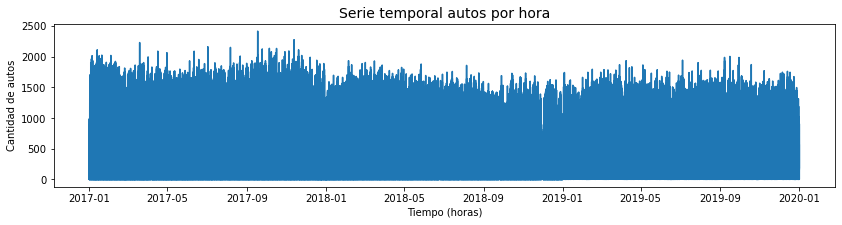

In [14]:
plt.figure(figsize = (14,3))
plt.plot(dataset.fecha, dataset.cantidad_pasos, '-')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Cantidad de autos')
plt.title('Serie temporal autos por hora', fontsize=14)
plt.show()

A continuación, reordeno el dataset por fecha

In [15]:
from sklearn import preprocessing
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
print(dataset.sentido.unique())
print(dataset.tipo_vehiculo.unique())

['Provincia' 'Centro']
['Pesado' 'Liviano']


Observo que los valores de los features sentido y tipo vehículo son variables categóricas que pueden tomar dos posibles valores cada una. Por tal motivo quiero realizarles un proceso para poder convertirlas en variables numéricas expresadas en cantidad de vehículos cada una. Para realizar esto ejecuto un Label Encoding para reemplazar el valor categórico de cada variable por valores 0 o 1 según corresponda con la selección:

**Feature**: sentido
* Provincia = 1
* Centro = 0

**Feature**: tipo_vehiculo
* Pesado = 1
* Liviano = 0

Seguido, en los casos que tengo 1 (sentido provincia y vehículo pesado) multiplico la variable cantidad_pasos por el 1 de la columna que realice el Encoding y obtengo para cada registro del dataset la cantidad de vehículos que circularon hacia provincia y la cantidad de vehículos que fueron de características pesado.

In [16]:
labelencoding = preprocessing.LabelEncoder()
labelencoding.fit(["Provincia", "Centro"])
dataset['cantidad_sentido_provincia']=dataset['cantidad_pasos']*labelencoding.transform(dataset[['sentido']].values.ravel())
labelencoding = preprocessing.LabelEncoder()
labelencoding.fit(["Pesado", "Liviano"])
dataset['cantidad_pesado']=dataset['cantidad_pasos']*labelencoding.transform(dataset[['tipo_vehiculo']].values.ravel())
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,cantidad_sentido_provincia,cantidad_pesado
0,Domingo,Provincia,Pesado,1,2017-01-01,1,1
1,Domingo,Provincia,Liviano,9,2017-01-01,9,0
2,Domingo,Provincia,Liviano,644,2017-01-01,644,0
3,Domingo,Provincia,Pesado,6,2017-01-01,6,6
4,Domingo,Provincia,Pesado,1,2017-01-01,1,1


### Resampleo
Realizo el resampleo del dataset por día. Agrupo y sumo la cantidad de pasos de vehículos por día.
Este resampleo hará que los features numéricos de mi dataset se sumen y me quedaran, además de las cantidades totales de vehículos que pasaron por día, la cantidad que lo hizo con sentido a provincia y la cantidad que fue del tipo tránsito pesado.

In [17]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 3)


,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado
fecha,,,
2017-01-01,31183,14132,542
2017-01-02,51568,23743,2589
2017-01-03,51093,23526,2771
2017-01-04,53332,24383,2751
2017-01-05,56486,25666,2864


Ahora calculo por diferencia los features de cantidad de pasos de vehículos por día que lo hicieron con el sentido contrario (sentido centro) y la cantidad de vehículos por día del tipo liviano. Luego los agrego a la serie 'diario'. Estos features me servirán para analizar mas en detalles la composición de la serie original, cantidad de pasos de vehículos y podre discriminar por los sentidos de paso para esos totales o los tipos que transitaron.

Además, seguramente serán features útiles a la hora de entrenar y testear los modelos que propondré para realizar predicciones del comportamiento futuro de la serie temporal.

In [18]:
diario['cantidad_liviano']=diario['cantidad_pasos']-diario['cantidad_pesado']
diario['cantidad_sentido_centro']=diario['cantidad_pasos']-diario['cantidad_sentido_provincia']
diario.head()

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
fecha,,,,,
2017-01-01,31183,14132,542,30641,17051
2017-01-02,51568,23743,2589,48979,27825
2017-01-03,51093,23526,2771,48322,27567
2017-01-04,53332,24383,2751,50581,28949
2017-01-05,56486,25666,2864,53622,30820


Observamos el grafico de la serie obtenida del resampleo para observar la evolución del paso de vehículos por cabina de peaje Illia por día desde inicio del año 2017 hasta fines de 2019.

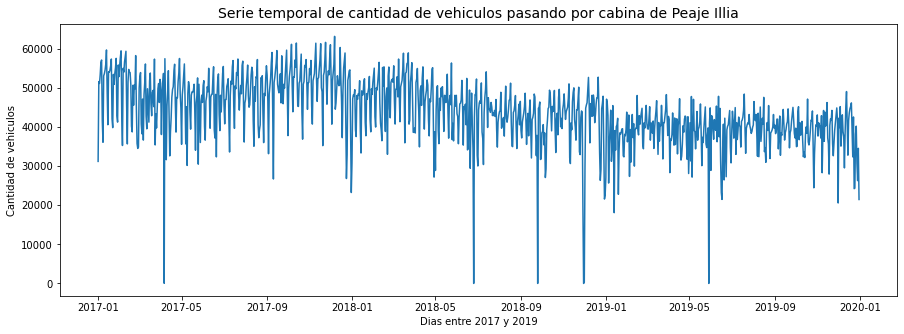

In [19]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Dias entre 2017 y 2019')
plt.ylabel('Cantidad de vehiculos')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia', fontsize=14)
plt.show()

En esta grafica puedo observar que hay valores que podrían ser outliers (valores que anómalos que deberé analizar para evaluar que eventos hicieron que estén presentes en la distribución). Imprimo con un filtro cuales son estos valores como para tener un primer análisis básico de donde están ubicados dentro de la serie.

In [20]:
diario.cantidad_pasos[diario.cantidad_pasos<20000]

fecha
2017-04-06       40
2018-06-25        0
2018-09-25        0
2018-11-29    19728
2018-11-30        0
2018-12-01      350
2019-01-13    18076
2019-05-29        0
Name: cantidad_pasos, dtype: int64

Buscare información adicional en internet para entender que eventos sobre autopista Illia pudieron ocurrir en estas fechas que hicieron que la cantidad de vehículos que pasaron difieran del resto de los valores de la serie.
Según el articulo https://eleconomista.com.ar/2019-05-paseo-del-bajo-record-12-minutos-para-conectar-illia-con-la-buenos-aires-la-plata/ la obra del paseo del bajo hizo que haya habido cierres de la autopista Illia durante la obra y previo a los días de su inauguración que fue el 27 de mayo de 2019.

Con esta información adicional obtenida en internet se puede saber que muchos de los valores outliers de la serie corresponden a cierres de la autopista por esta obre que estaba en marcha desde inicios del año 2017.

Realizo la gráfica de la serie temporal para los features que calcule sobre vehículos que pasaron con sentido centro y sentido provincia. Me servirá para visualizar del total de vehículos que pasaron por día en la cabina de peaje Illia como fue la distribución de valores en cada uno de los sentidos mencionados.

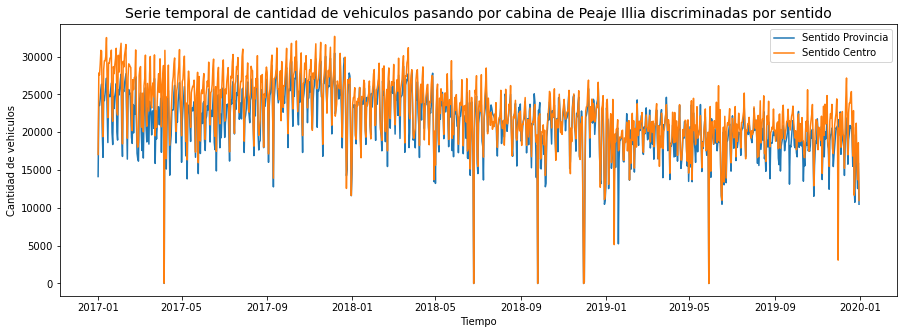

In [21]:
plt.figure(figsize = (15,5))
sns.lineplot(diario.index, diario.cantidad_sentido_provincia,label='Sentido Provincia',palette='bright')
sns.lineplot(diario.index, diario.cantidad_sentido_centro, label='Sentido Centro',palette='bright')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia discriminadas por sentido', fontsize=14)
plt.show()

En esta representación veo en ambas series los eventos que había descripto anteriormente. Observo que se dieron en ambos sentidos, o sea la autopista se encontró cerrada en estos días analizados.

Ahora analizo los valores estadísticos sobre los features del dataset diario para analizar como eliminar estos valores outliers que podrían distorsionar las predicciones por eventos ajenos al normal comportamiento del tránsito sobre la autopista.

### Tratamiento de valores atípicos

In [22]:
diario.describe()

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,43712.859361,21149.054795,1394.568037,42318.291324,22563.804566
std,8192.736927,3934.687471,636.171036,7659.024427,4416.781097
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39061.500000,18852.500000,876.000000,38058.500000,20059.000000
50%,43761.000000,21351.000000,1361.000000,42360.000000,22296.000000
75%,49498.000000,23915.000000,1909.000000,47626.000000,25705.500000
max,63127.000000,30458.000000,2983.000000,60748.000000,32669.000000


Observo que todos los features que tienen valor min = 0 y en casi en todos los casos se encuentran muy distantes del valor del cuartil 25%. Esto me dice que son valores muy atípicos. 

Para visualizar mejor esto, realizare gráficos de boxplot para entender la distribución de cada feature, visualizar los cuartiles y estos casos de valores atípicos presentes en ciertos días de la serie.

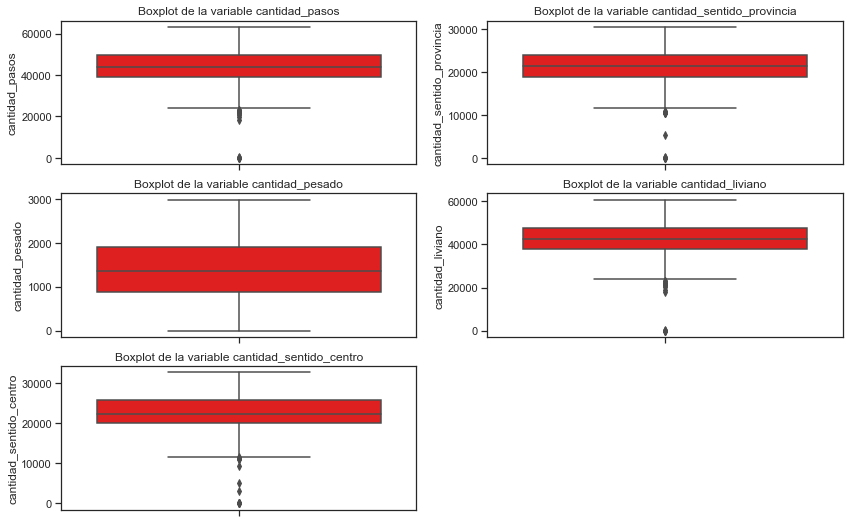

In [23]:
sns.set(style="ticks")
plt.figure(figsize = (14,9))

for i, variable in enumerate(['cantidad_pasos', 'cantidad_sentido_provincia','cantidad_pesado', 
                              'cantidad_liviano','cantidad_sentido_centro']):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=variable, data=diario, color='red')
    variabley= variable
    variablet='Boxplot de la variable '+variable
    plt.ylabel(variabley)
    plt.title(variablet)
plt.show()

Observo como en casi todos los boxplot se identifican valores atípicos (pueden ser outliers), salvo en la variable cantidad de pasos de vehículos pesados. 

Realizare un filtro utilizando el método del rango intercuartilico para identificar todos estos valores atipicos y les imprimiré un **valor NaN** para luego utilizar la función **interpolate()** para rellenarlos con valores estimados. Esta realiza una interpolación lineal entre el valor anterior y posterior al valor con NaN, e imputa este último con el resultado de evaluar esa recta en la posición del NaN en la serie.

Con el siguiente código mediante un ciclo for realizare las operaciones descriptas.

In [24]:
modelos=['cantidad_pasos', 'cantidad_sentido_provincia','cantidad_liviano','cantidad_sentido_centro']
for i, model in enumerate(['cantidad_pasos', 'cantidad_sentido_provincia',
                           'cantidad_liviano','cantidad_sentido_centro']):
    q25,q75 = np.nanpercentile(diario[model], [25,75])
    iqr = q75 - q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr
    print('\033[1m'+f'Feature: {modelos[i]}'+'\033[0;0m')
    print('Cuartil 25:',q25,'Cuartil 75:',q75,'Valor IQR:',iqr,'Valor minimo:', minimo,
          'Valor maximo:', maximo)
    mascara_outliers = ((diario[model] < minimo) | (diario[model]> maximo))
    diario[mascara_outliers]=np.NaN
diario=diario.interpolate()

Feature: cantidad_pasos
Cuartil 25: 39061.5 Cuartil 75: 49498.0 Valor IQR: 10436.5 Valor minimo: 23406.75 Valor maximo: 65152.75
Feature: cantidad_sentido_provincia
Cuartil 25: 18959.5 Cuartil 75: 23945.5 Valor IQR: 4986.0 Valor minimo: 11480.5 Valor maximo: 31424.5
Feature: cantidad_liviano
Cuartil 25: 38218.75 Cuartil 75: 47739.0 Valor IQR: 9520.25 Valor minimo: 23938.375 Valor maximo: 62019.375
Feature: cantidad_sentido_centro
Cuartil 25: 20127.0 Cuartil 75: 25732.0 Valor IQR: 5605.0 Valor minimo: 11719.5 Valor maximo: 34139.5


Una vez realizada la identificación e interpolación de valores atípicos, vuelvo a graficar los boxplot para ver el resultado sobre cada feature de este trabajo.

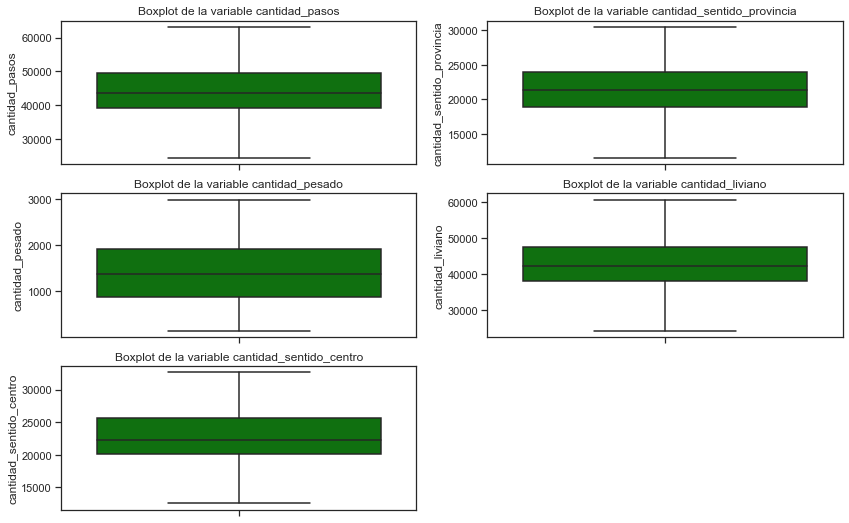

In [25]:
sns.set(style="ticks")
plt.figure(figsize = (14,9))

for i, variable in enumerate(['cantidad_pasos', 'cantidad_sentido_provincia','cantidad_pesado', 
                              'cantidad_liviano','cantidad_sentido_centro']):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=variable, data=diario, color='green')
    variabley= variable
    variablet='Boxplot de la variable '+variable
    plt.ylabel(variabley)
    plt.title(variablet)
plt.show()

Veo que los valores atípicos han sido corregidos. Nuevamente quiero dejar en claro que necesite información adicional para poder identificar que este no era un comportamiento habitual de la distribución de pasos de vehículos sobre la autopista Illia, sino que habían sido provocado por eventos ajenos al desempeño normal de paso de vehículos. Una acción externa, única y que no tiene una estacionalidad sobre esta serie analizada ocurrió y esto desencadeno estos valores atípicos.

Grafico nuevamente la serie temporal de cantidad_pasos ahora sin valores atípicos.

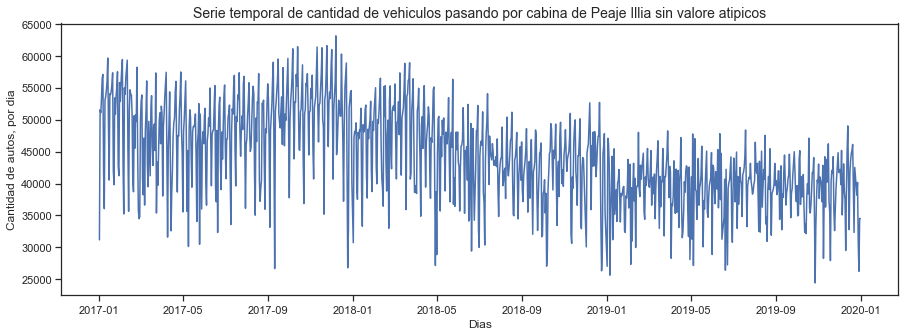

In [26]:
plt.figure(figsize = (15,5))
sns.lineplot(diario.index, diario.cantidad_pasos,palette='bright')
plt.xlabel('Dias')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia sin valore atipicos', fontsize=14)
plt.show()

Grafico nuevamente las series temporales de cantidad_pasos por sentido, ahora sin valores atípicos.

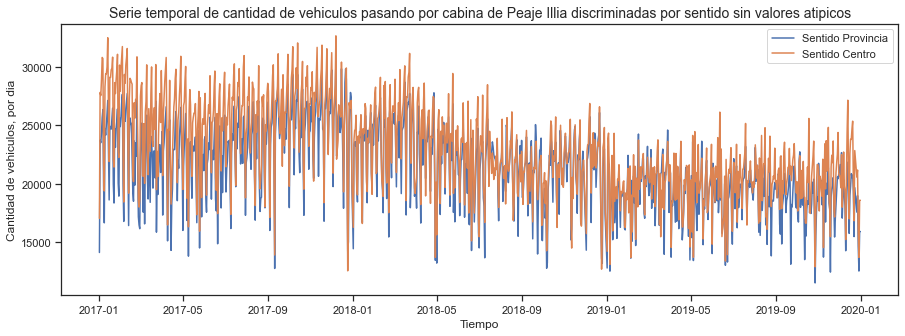

In [27]:
#Grafico la serie de sentido
plt.figure(figsize = (15,5))
sns.lineplot(diario.index, diario.cantidad_sentido_provincia,label='Sentido Provincia',palette='bright')
sns.lineplot(diario.index, diario.cantidad_sentido_centro, label='Sentido Centro',palette='bright')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos, por dia')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia discriminadas por sentido sin valores atipicos', fontsize=14)
plt.show()

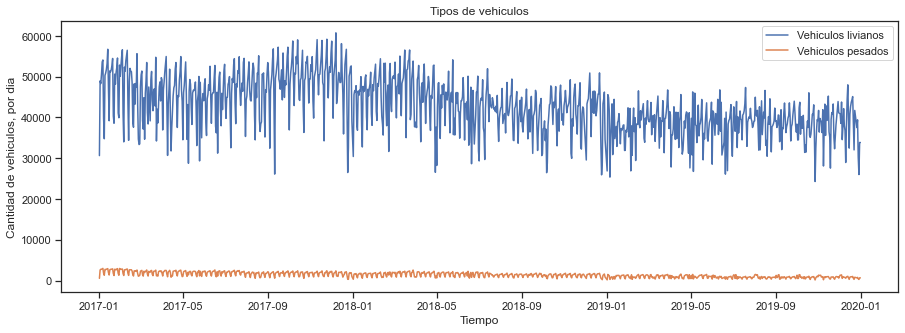

In [28]:
#Grafico la serie de tipo de vehiculo
plt.figure(figsize = (15,5))
sns.lineplot(diario.index, diario.cantidad_liviano,label='Vehiculos livianos',palette='dark')
sns.lineplot(diario.index, diario.cantidad_pesado, label='Vehiculos pesados',palette='dark')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos, por dia')
plt.title('Tipos de vehiculos')
plt.show()

Para observar desde otra óptica las distribuciones de pasos de vehículos realizo los histogramas de la variable cantidad_pasos para cada año y los integro en una gráfica para poder visualizar como fue evolucionando por año esta distribución.

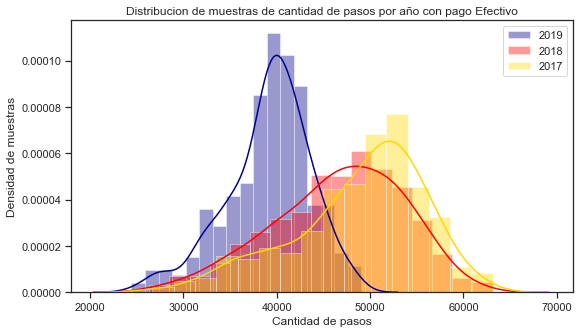

In [29]:
plt.figure(figsize = (9,5))
sns.distplot(diario.cantidad_pasos[diario.index>='2019'], color='darkblue',hist=True, label='2019')
sns.distplot(diario.cantidad_pasos[(diario.index<'2019')&(diario.index>'2017')], color='red',hist=True, label='2018')
sns.distplot(diario.cantidad_pasos[diario.index<='2018'], color='gold',hist=True, label='2017')
plt.legend()
plt.xlabel('Cantidad de pasos')
plt.ylabel('Densidad de muestras')
plt.title('Distribucion de muestras de cantidad de pasos por año con pago Efectivo')
plt.show()

Puedo notar que las distribuciones (histogramas) van desplazándose hacia la izquierda a medida que transcurren los años. Van moviéndose hacia valores más chicos de cantidad de pasos de vehículos por día. 

Esto me da una idea de la tendencia decreciente en la cantidad de vehículos que pasaron con pago en efectivo desde 2017 hasta 2019.

Voy a analizar la tendencia de la serie para ver si puedo confirmar este primer análisis surgido de los histogramas por año. Resampleo la serie por semana para poder calcular mediante una ventana móvil la tendencia de esta serie.

### Análisis de tendencia

In [30]:
#Reviso Tendencia - Resampleamos nuestros datos para agrupar por semana
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head(3)

(158, 3)


,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado
fecha,,,
2017-01-01,31183,14132,542
2017-01-08,347212,160248,17049
2017-01-15,366413,168540,17290


Para el método de ventana móvil (Rolling Windows) voy a utilizar una ventana de valor 365/30

In [31]:
ventana = int(365/30) # Defino una ventana para hacer el metodo de ventana movil o rolling windows. 
semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
print('Tamaño de la serie de tendencia:', semanal_promedio_tendencia.shape)

Tamaño de la serie de tendencia: (158,)


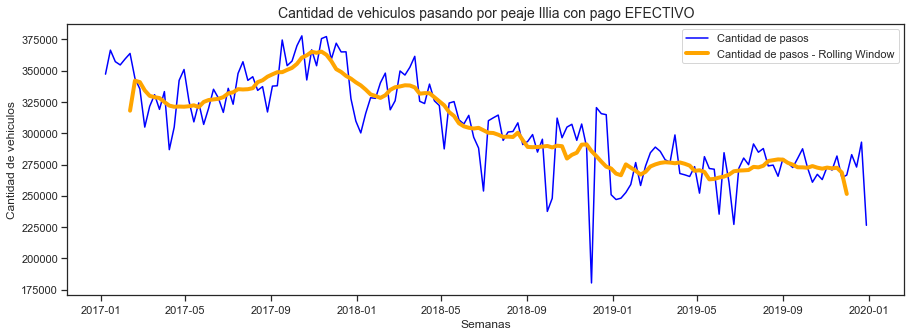

In [32]:
semanal.drop(semanal[semanal.index<='2017-01-01'].index,axis=0, inplace=True)
semanal.drop(semanal[semanal.index>='2020-01-01'].index,axis=0, inplace=True)
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de pasos', color='blue')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window', color='orange')
plt.xlabel('Semanas')
plt.ylabel('Cantidad de vehiculos')
plt.title('Cantidad de vehiculos pasando por peaje Illia con pago EFECTIVO', fontsize=14)
plt.legend()
plt.show()

Veo que la tendencia de la serie va decreciendo con el paso del tiempo. Esto confirma los analizado en primera instancia con las distribuciones por año. Lo que a priori puede inferirse es que ha cambiado la forma de pago. Esta ha migrado a otras disponibles y en las cuales el gobierno de la ciudad ha trabajado para incentivar como lo son **TELEPASE** (Pago automático con el paso del vehículo).

Ahora analizo la tendencia de la serie de cantidad de pasos diaria.

In [33]:
#Analisis tendencia diario
ventana = int(365/7)# Defino una ventana mayor que en el caso de semanal, para hacer el metodo de ventana movil o rolling windows. 
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
print('Tamaño de la serie de tendencia:', diario_promedio_tendencia.shape)

Tamaño de la serie de tendencia: (1095,)


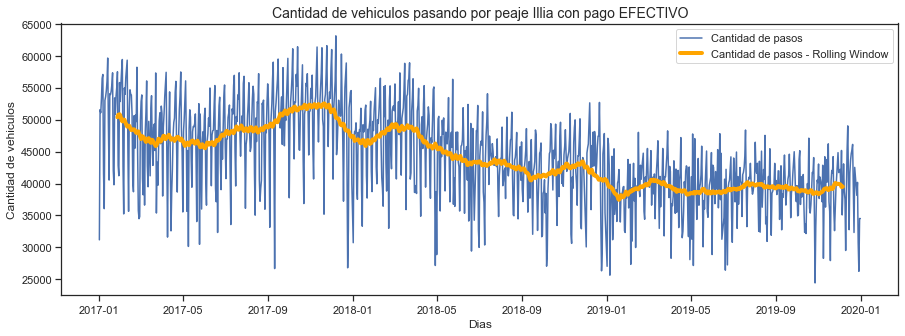

In [34]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window', color='orange')
plt.xlabel('Dias')
plt.ylabel('Cantidad de vehiculos')
plt.title('Cantidad de vehiculos pasando por peaje Illia con pago EFECTIVO', fontsize=14)
plt.legend()
plt.show()

Mismas conclusiones que con la serie semanal. La tendencia es que hay una baja con el paso del tiempo de la cantidad de vehículos que pasan por la autopista Illia y pagan peaje con método en efectivo.

Para estar seguro de esta hipótesis veo que sucede con la tendencia de la serie ahora **observando la forma de pago por TELEPASE**.

In [35]:
mask = np.logical_and(dataset_original.estacion=='Illia', dataset_original.forma_pago == 'TELEPASE')
dataset_telepase = dataset_original[mask].copy()

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_telepase.head()

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_telepase = dataset_telepase.resample('D', on = 'fecha').sum()
print(diario_telepase.shape)
diario_telepase.head(3)

(1095, 3)


,periodo,hora_inicio,cantidad_pasos
fecha,,,
2017-01-01,284397,1801,12326
2017-01-02,480046,2738,35621
2017-01-03,453825,2582,39390


In [36]:
#Analisis tendencia diario
ventana = int(365/7)# Defino una ventana mayor que en el caso de semanal, para hacer el metodo de ventana movil o rolling windows. 
diario_telepase_promedio_tendencia = diario_telepase.cantidad_pasos.rolling(window=ventana, center = True).mean()
print('Tamaño de la serie de tendencia:', diario_telepase_promedio_tendencia.shape)

Tamaño de la serie de tendencia: (1095,)


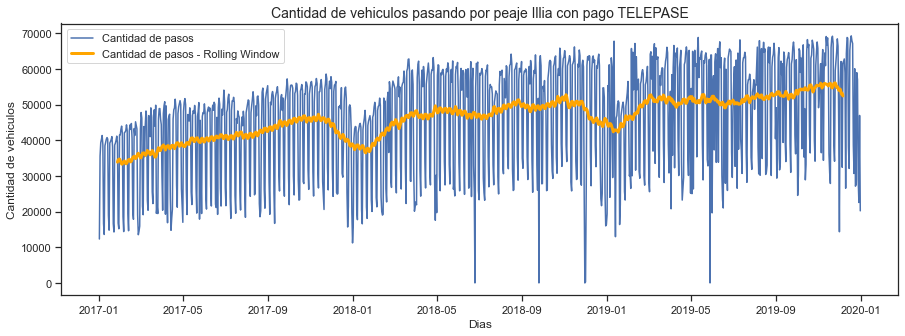

In [37]:
plt.figure(figsize = (15,5))
plt.plot(diario_telepase.index, diario_telepase.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_telepase_promedio_tendencia, lw = 3, label = 'Cantidad de pasos - Rolling Window', color='orange')
plt.xlabel('Dias')
plt.ylabel('Cantidad de vehiculos')
plt.title('Cantidad de vehiculos pasando por peaje Illia con pago TELEPASE', fontsize=14)
plt.legend()
plt.show()

**CONCLUSION:** Puedo comprobar que la tendencia de la serie temporal pases de vehículos por AU Illia con pago TELEPASE tiene pendiente positiva. A medida que pasaron los años los conductores migraron su forma de pago de EFECTIVO hacia TELEPASE.

### Librería Stats Models para análisis completo de la serie
A continuación, usare la librería stats models para realizar este análisis automático. Hasta ahora lo realizado fue un trabajado en forma más artesanal y esta librería lo simplifica en pocos comandos.
Las series en su modelo aditivo se componen de **Tendencia + Estacionalidad + Residuo**. Esta librería realiza esta descomposición de las componentes de la serie en forma automática. 

Uso el seasonal_decompose que descompone la serie en sus componentes estacionales usando promedios móviles.

In [38]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

result0 = seasonal_decompose(diario.cantidad_pasos,period=ventana, model='additive')
result1 = seasonal_decompose(diario.cantidad_liviano,period=ventana, model='additive')
result2 = seasonal_decompose(diario.cantidad_pesado,period=ventana, model='additive')
result3 = seasonal_decompose(diario.cantidad_sentido_provincia,period=ventana, model='additive')
result4 = seasonal_decompose(diario.cantidad_sentido_centro,period=ventana, model='additive')

A continuación, grafico los resultados de cada descomposición para ver la **serie, tendencia y estacionalidad** de cada feature de mi serie sampleada por día. 

Analizare las series gráficamente e individualmente: cantidad de pasos, cantidad liviano, cantidad pesado, cantidad sentido centro y cantidad sentido provincia.

#### Grafico para cada feature la serie, su tendencia y su estacionalidad.
#### Cantidad de pasos de vehículos por día.

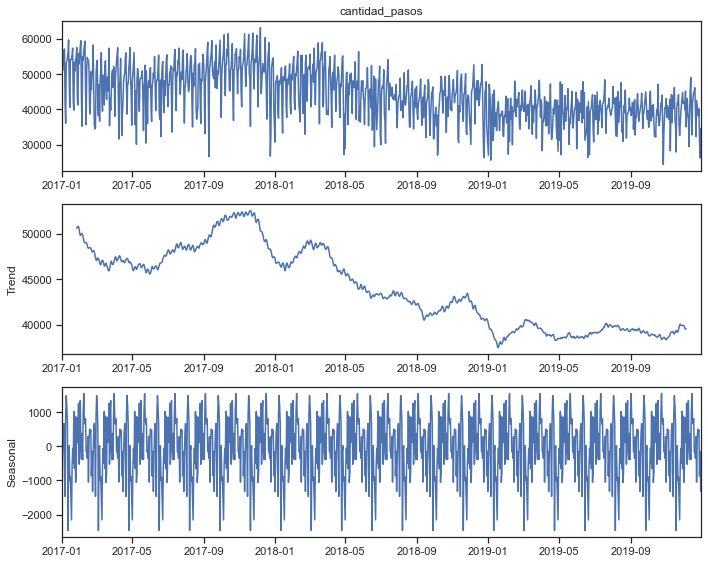

In [39]:
plt.rcParams['figure.figsize'] = [10,8]
result0.plot(resid=False)
plt.show()

#### Cantidad de transito liviano.

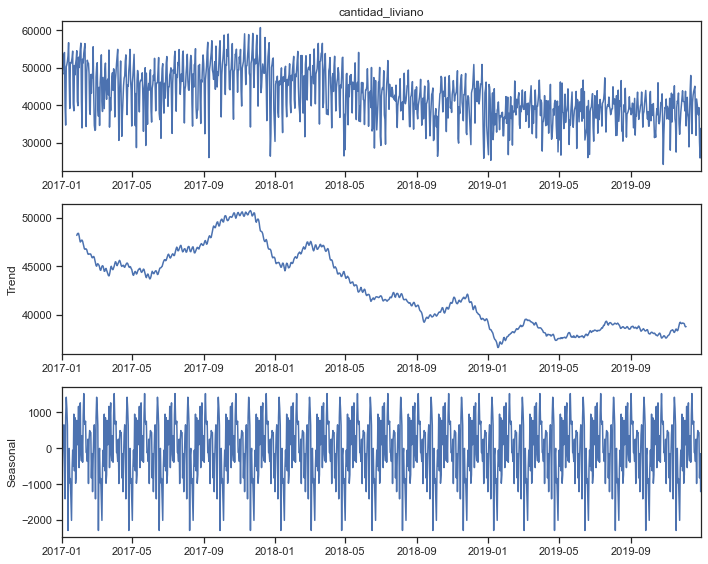

In [40]:
result1.plot(resid=False)
plt.show()

#### Cantidad de transito pesado.

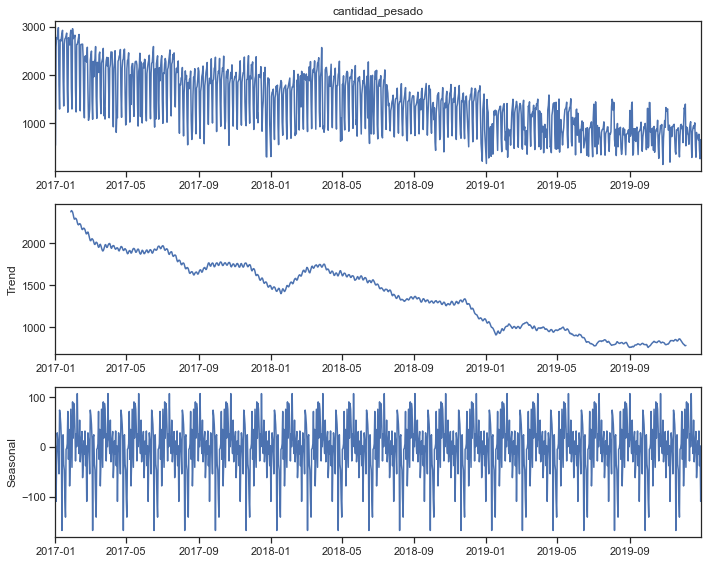

In [41]:
result2.plot(resid=False)
plt.show()

#### Cantidad de transito sentido a provincia.

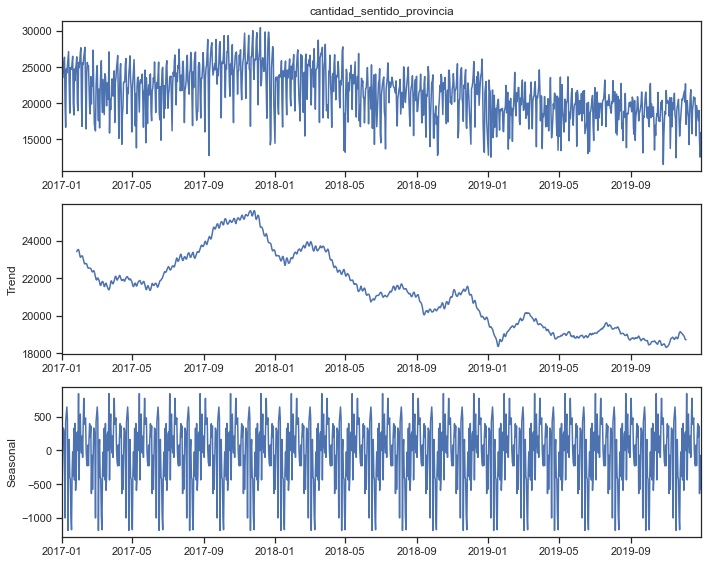

In [42]:
result3.plot(resid=False)
plt.show()

#### Cantidad de transito sentido al centro.

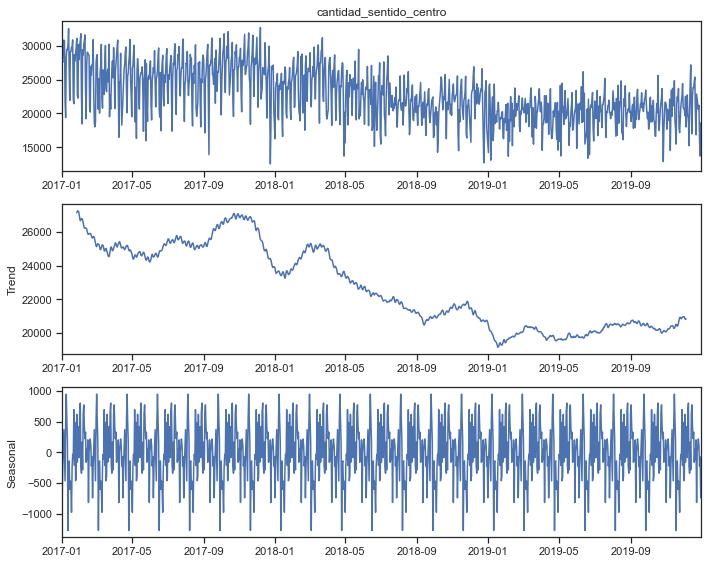

In [43]:
result4.plot(resid=False)
plt.show()

Para cada serie analizada puedo ver los gráficos de la serie en el tiempo, su tendencia (trend) y estacionalidad (Seasonal).

Volviendo a lo dicho en párrafos anteriores en el **modelo Aditivo** la **Serie = Tendencia + Estacionalidad + Residuos**, entonces grafico más abajo la distribución de estos residuos para cada una de las series.

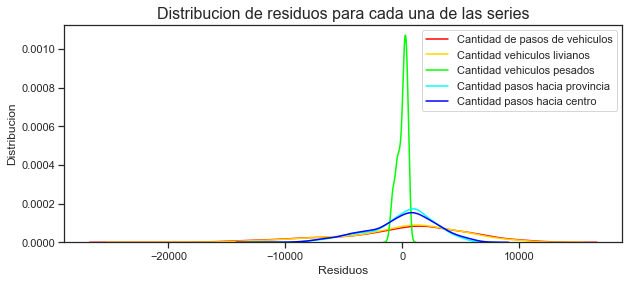

In [44]:
plt.figure(figsize=(10,4))
sns.distplot(result0.resid, bins=20, label='Cantidad de pasos de vehiculos'
             ,hist=False,norm_hist=True,kde=True, color='red')
sns.distplot(result1.resid, bins=20, label='Cantidad vehiculos livianos'
             ,hist=False,norm_hist=True,kde=True, color='gold' )
sns.distplot(result2.resid, bins=20, label='Cantidad vehiculos pesados'
             ,hist=False,norm_hist=True,kde=True, color='lime' )
sns.distplot(result3.resid, bins=20, label='Cantidad pasos hacia provincia'
             ,hist=False,norm_hist=True,kde=True, color='aqua' )
sns.distplot(result4.resid, bins=20, label='Cantidad pasos hacia centro'
             ,hist=False, norm_hist=True,kde=True, color='blue' )
plt.xlabel('Residuos')
plt.ylabel('Distribucion')
plt.title('Distribucion de residuos para cada una de las series', fontsize=16)
plt.legend()
plt.show()

También analizo la auto correlación para evaluar cómo se relacionan los valores últimos de la serie de tiempo con sus valores pasados y encontrar ventanas optimas de tiempo donde la correlación de la serie, con su versión del pasado, sean máximas.

### Autocorrelacion

In [45]:
#Hago autocorrelacion con un lag de 182 dias
nlags =  182
autocorr = acf(diario.cantidad_pasos,missing='raise', fft=True, adjusted=True, nlags = nlags)

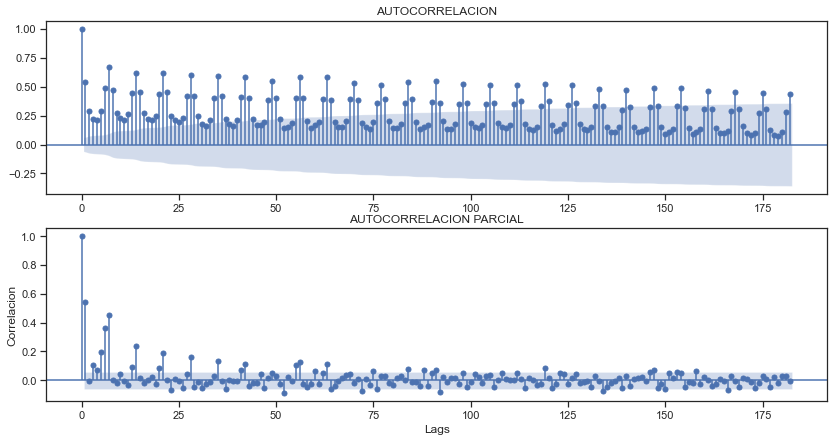

In [46]:
fig, ax = plt.subplots(2,1,figsize=(14,7))
plt.xlabel('Lags')
plt.ylabel('Correlacion')
sm.graphics.tsa.plot_acf(diario.cantidad_pasos.squeeze(), lags=nlags, ax=ax[0],title='AUTOCORRELACION')
sm.graphics.tsa.plot_pacf(diario.cantidad_pasos.squeeze(), lags=nlags, ax=ax[1],title='AUTOCORRELACION PARCIAL')
plt.show()

En los gráficos observo que, cada 7 días la correlación es máxima. La serie diaria posee una estacionalidad por semana y se ve reflejada en los valores de auto correlación.

**CONCLUSION:** Al analizar las series por separado (para Illia + Pago Efectivo), veo que en todos los casos se conserva esa tendencia a la baja (pendiente negativa). Es decir, a medida que pasa el tiempo, desde el año 2017 hasta 2019, los conductores fueron cambiando su forma de pago, abandonando la modalidad EFECTIVO para pasar a otros como TELEPASE.

Se puede observar que hay una fuerte estacionalidad semanal en las series. Hay una alta auto correlación de esta con ella misma en lags múltiplos de semanas (7 días).

### Anexo N°1 - Definición de funciones

Pongo este espacio para definir todas las funciones que utilizare en el resto del código.

In [47]:
#Funcion que separa el campo fecha en sus distintas componentes (año, mes, dia, hora, dia de 
#                                                                 la semana, dia del año, etc)
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['hora'] = df['date'].dt.hour
    df['diadelasemana'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['mes'] = df['date'].dt.month
    df['año'] = df['date'].dt.year
    df['diadelaño'] = df['date'].dt.dayofyear
    df['diadelmes'] = df['date'].dt.day
    df['semanadelaño'] = df['date'].dt.isocalendar().week
    X = df[['hora','diadelasemana','quarter','mes','año',
           'diadelaño','diadelmes','semanadelaño']]
    if label:
        y = df[label]
        return X, y
    return X

# Funcion que calcula el Porcentaje de error absoluto medio mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def cargo_metricas (mse_train, mse_test, mape_test, modelo):
    metricas=[np.sqrt(rmse_train), np.sqrt(rmse_test), mape_test, modelo]
    return metricas

### Análisis del comportamiento de la serie.

Realizare un análisis del comportamiento de la serie de acuerdo a las ventanas de tiempo:
* **Mes del año**
* **Día del mes**
* **Día de la semana** 

Utilizo la función que he definido en código anterior para generar los features que necesito para hacer el análisis de la serie en los distintos periodos de tiempo. Meses del año, días del mes y días de la semana.

In [48]:
import calendar
import warnings as w
w.filterwarnings('ignore')
X, y = create_features(diario, label='cantidad_pasos')
print('El tamaño del set X es:',X.shape)
X.head(3)

El tamaño del set X es: (1095, 8)


,hora,diadelasemana,quarter,mes,año,diadelaño,diadelmes,semanadelaño
fecha,,,,,,,,
2017-01-01,0,6,1,1,2017,1,1,52
2017-01-02,0,0,1,1,2017,2,2,1
2017-01-03,0,1,1,1,2017,3,3,1


In [49]:
print('El tamaño del set y es:',y.shape)
y.head(3)

El tamaño del set y es: (1095,)


fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [50]:
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head(3)

,hora,diadelasemana,quarter,mes,año,diadelaño,diadelmes,semanadelaño,cantidad_pasos
fecha,,,,,,,,,
2017-01-01,0,6,1,1,2017,1,1,52,31183.0
2017-01-02,0,0,1,1,2017,2,2,1,51568.0
2017-01-03,0,1,1,1,2017,3,3,1,51093.0


In [51]:
media_por_mes=features_and_target.groupby(['mes']).mean()
media_por_diames=features_and_target.groupby(['diadelmes']).mean()
media_por_dia=features_and_target.groupby(['diadelasemana']).mean()

In [52]:
media_por_dia['nombre_dia']= media_por_dia.index
for i in (np.arange(0,7,1)):
    media_por_dia.nombre_dia.loc[i]=calendar.day_name[i]

media_por_mes['nombre_mes']= media_por_mes.index
for i in (np.arange(1,13,1)):
    media_por_mes.nombre_mes.loc[i]=calendar.month_name[i]        

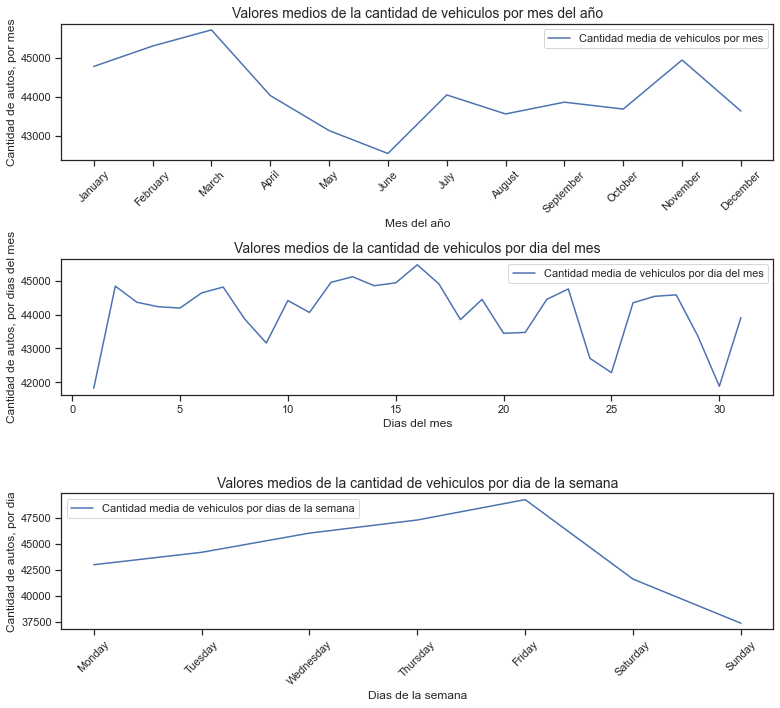

In [53]:
graph = plt.figure(figsize = (11,10))
plt.subplot(3,1,1)
plt.plot(media_por_mes.nombre_mes, media_por_mes.cantidad_pasos.values, label='Cantidad media de vehiculos por mes')
plt.xlabel('Mes del año')
plt.ylabel('Cantidad de autos, por mes')
plt.title('Valores medios de la cantidad de vehiculos por mes del año', fontsize=14)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(3,1,2)
plt.plot(media_por_diames.index, media_por_diames.cantidad_pasos, label='Cantidad media de vehiculos por dia del mes')
plt.xlabel('Dias del mes')
plt.ylabel('Cantidad de autos, por dias del mes')
plt.title('Valores medios de la cantidad de vehiculos por dia del mes', fontsize=14)
plt.legend()

plt.subplot(3,1,3)
plt.plot(media_por_dia.nombre_dia, media_por_dia.cantidad_pasos, label='Cantidad media de vehiculos por dias de la semana')
plt.xlabel('Dias de la semana')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Valores medios de la cantidad de vehiculos por dia de la semana', fontsize=14)
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
graph.show()

**Conclusión:** Al analizar estas graficas observo:
* **Según meses del año**: que marzo y noviembre son los meses que más pasos de vehículos con pago efectivo tiene el peaje de la autopista Illia. 
* **A nivel de días del mes**: al inicio entre el 2 y el 7 hay una gran afluencia de este tipo de pasos (pago en efectivo). Luego disminuye hasta que entre 12 y 17 vuelve a incrementarse la circulación. Luego se observa un nuevo aumento entre el 26 y 28 del mes.
* **En días de la semana**: Observo que la cantidad de pasos de vehículos va en aumento desde el lunes (primer día de la semana) hasta que hace el pico los días viernes. Luego sábado y domingo hay un marcado descenso de la cantidad de pases.

##  **Parte B** - Modelos de Machine Learning

A continuación, definiré un modelo Random Forest y luego lo comparare con otro modelo de predicción extremadamente simple que predice el valor siguiente a partir del valor actual (Modelo Benchmark). Luego de esta comparación, realizare un modelo utilizando la librería Prophet y comparare todos los modelos para así concluir cual es el que aproxima mejor las predicciones y evita el over y underfitting

In [54]:
#Hago split de datos
split_date = '2019-09-30'
diario_train = diario.loc[diario.index <= split_date].copy()
diario_test = diario.loc[diario.index > split_date].copy()
diario_train.head(3)

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
fecha,,,,,
2017-01-01,31183.0,14132.0,542.0,30641.0,17051.0
2017-01-02,51568.0,23743.0,2589.0,48979.0,27825.0
2017-01-03,51093.0,23526.0,2771.0,48322.0,27567.0


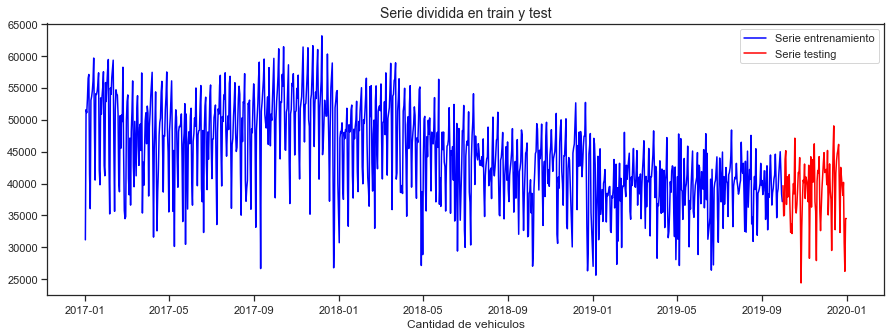

In [55]:
plt.figure(figsize= (15,5))
plt.plot(diario_train.cantidad_pasos, color='blue',label='Serie entrenamiento')
plt.plot(diario_test.cantidad_pasos, color='red', label='Serie testing')
plt.xlabel('Dias')
plt.xlabel('Cantidad de vehiculos')
plt.title('Serie dividida en train y test', fontsize=14)
plt.legend()
plt.show()

## Modelo Random Forest

Voy a implementar y evaluar un modelo regresor de Random Forest para predecir los valores futuros de la serie. Luego probare con otros modelos (Benchmark y Prophet) para compararlos. 

**Selecciono las métricas RMSE y MAPE** para evaluar el desempeño de los modelos y comprarlos entre si.
Estas métricas las selecciono por estar en un problema de regresión. 
* **La metrica RMSE** la selecciono ya que, por ser la raíz del error cuadrático medio entre las muestras reales y la predicción, estará en las mismas unidades que el valor a predecir o contra el que comparo. Por este motivo es un muy buen indicador, comprensible numéricamente, de cuan desplazada esta la predicción de la muestra real.
* **La metrica MAPE** (Porcentaje del error absoluto medio) me da una idea acabada del porcentaje de error absoluto que se comete en las predicciones. También confiere un resultado que puede ser interpretado fácilmente por el lector.

Importo todas las librerías que usare para esta parte B del proyecto.

In [56]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
import scipy as sp
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import numpy as np
import pandas as pd

A continuacion armo los set de datos para entrenamiento y testing del modelo. Tambien defino la ventana de tiempo (look back) que usare para predecir el valor siguiente con el modelo.

In [57]:
rmse_train=[]
rmse_test=[]
mape_test=[]
nombre_modelo=[]
#Cargo serie de tiempo cantidad de pasos que es lo que quiero predecir
senial1 = diario.cantidad_pasos

#Definino un look_back ventana que voy a mirar para predecir el valor futuro
look_back = 120 # usamos 120 valores para predecir el siguiente numero de pasos (4 meses)
N = senial1.shape[0] # N es 1095 serian 365 dias x 3 años.

#Armo una variable vacia X (matriz) para luego guardar cada valor
#Armo una variable y que tendra los valores de la señal "cantidad de pasos" que quiero 
#entrenar y luego predecir
X1 = np.zeros((N - look_back -1,look_back))
y = np.zeros(N - look_back - 1)

#Con el ciclo for cargo los valores en la matriz X.
for i in range(X1.shape[0]):
    X1[i,:] = senial1.iloc[i:i+look_back]
    y[i] = senial1.iloc[i+look_back]  
    
#Defino los tamaños de cada set de datos para Train y para Test
N_train = ((1000)- look_back) # cantidad de instancias que vamos a usar para entrenar (2 años y 9 meses). 
N_test = 90 #cantidad de puntos (dias) que vamos a usar para evaluar (3 meses).
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Renombro X1
X=X1

#Imprimo el tamaño de X e y 
print('Tamaño X',X.shape,'Tamaño y', y.shape)

#Separo entre X_train e y_train e imprimo sus tamaños
X_train = X[:N_train,:]
y_train = y[:N_train]
print('Tamaño X_train',X_train.shape,'Tamaño y_train', y_train.shape)

#Separo entre X_test e y_test e imprimo sus tamaños
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print('Tamaño X_test',X_test.shape, 'Tamaño y_test',y_test.shape)

Tamaño X (974, 120) Tamaño y (974,)
Tamaño X_train (880, 120) Tamaño y_train (880,)
Tamaño X_test (90, 120) Tamaño y_test (90,)


Defino el modelo y la grilla para hacer un Random Search de hiperparametros para optimizar el modelo.

In [58]:
random_forest = RandomForestRegressor()

# Grilla para Random Search
param_dist = {'n_estimators':sp.stats.randint(100, 300),
              'max_depth': sp.stats.randint(2, 14),
              'max_features':['sqrt', 'log2', 'auto'], #,'auto'
              'min_samples_split':sp.stats.randint(2, 8),
              'min_samples_leaf':sp.stats.randint(2, 6)}

Hago Random Search con cross validation

In [59]:
random_forest_random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, 
                           scoring='neg_mean_squared_error',n_jobs=3, cv=5)

Entreno el modelo

In [60]:
random_forest_random_search.fit(X_train,np.ravel(y_train))

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=3,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610C9C5148>,
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610DC75848>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610C9C5C88>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610D9CE488>},
                   scoring='neg_mean_squared_error')

Reviso cuales fueron los mejores hiperparametros una vez hecho el Random Search

In [61]:
random_forest_random_search.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 141}

Realizo las predicciones para X_train y X_test

In [62]:
y_pred = random_forest_random_search.predict(X)
y_train_pred = random_forest_random_search.predict(X_train)
y_test_pred = random_forest_random_search.predict(X_test)

Grafico la serie original y las predicciones en train y test.

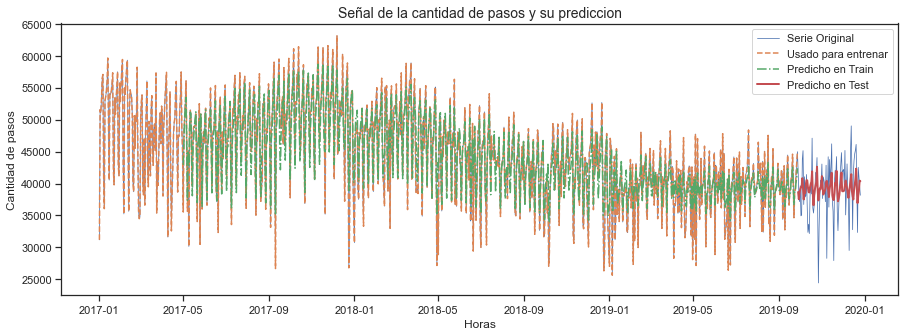

In [63]:
plt.figure(figsize=(15,5))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[:N_train + look_back], senial1[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial1.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred,'-', lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Horas')
plt.ylabel('Cantidad de pasos')
plt.title('Señal de la cantidad de pasos y su prediccion', fontsize=14)
plt.show()

Analizo las metricas que seleccione para comparar y optimizar los modelos (RMSE y MAPE).

In [64]:
MSE_train_random_forest_1_variable = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_train_random_forest_1_variable))

MSE_test_random_forest_1_variable = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_test_random_forest_1_variable))

Error en Train: 2961.5240408375716
Error en Test: 3909.755190350091


In [65]:
MAPE_test_random_forest_1_variable=mean_absolute_percentage_error(y_test,y_test_pred)
print('El porcentaje del error medio absoluto en test es:',MAPE_test_random_forest_1_variable,'%')

El porcentaje del error medio absoluto en test es: 8.264265031383632 %


In [66]:
rmse_train.append(np.sqrt(MSE_train_random_forest_1_variable))
rmse_test.append(np.sqrt(MSE_test_random_forest_1_variable))
mape_test.append(MAPE_test_random_forest_1_variable)
nombre_modelo.append('Random Forest con un feature')

## Modelo Random Fores con mas features

Voy a probar si agregar más datos, provenientes de las series que descompuse de la original, harán que el modelo mejore en su entrenamiento y predicción. Estas series son cantidad_liviano, cantidad_pesado, cantidad_sentido_centro y cantidad_sentido_provincia.

Para comenzar grafico la matriz de correlación para identificar cuál de estas series se correlaciona con más intensidad con la serie original (cantidad de pasos).

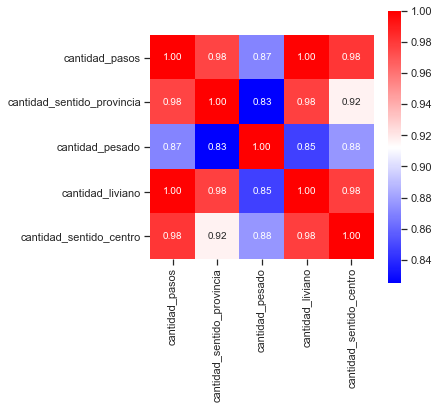

In [67]:
plt.figure(figsize=(5,5))
sns.heatmap(diario.corr(), cbar = True, square = True, annot=True, fmt= '.2f',
            annot_kws={'size': 10}, xticklabels= diario.corr().columns,  yticklabels=diario.columns, cmap= 'bwr')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Observando la matriz de correlación veo que la serie cantidad de pasos correlaciona con valores cercanos a 1 con cantidad_liviano (1), cantidad_sentido_centro (0.98) y cantidad_sentido_provincia (0.98).

In [68]:
#Cargo las distintas series de tiempo que mas correlacionan con cantidad de pasos que 
#es lo que quiero predecir
senial1 = diario.cantidad_pasos
senial2 = diario.cantidad_liviano
senial3 = diario.cantidad_sentido_centro
senial4 = diario.cantidad_sentido_provincia

#Definino un look_back ventana que voy a mirar para predecir el valor futuro
look_back = 120 # usamos 120 dias para predecir el siguiente numero de pasos
N = senial1.shape[0] # N es 1095 serian 365 dias x 3 años

#Armo una variable vacia X (matriz) para luego guardar cada valor de las distintas señales 
X1 = np.zeros((N - look_back -1,look_back))
X2 = np.zeros((N - look_back -1,look_back))
X3 = np.zeros((N - look_back -1,look_back))
X4 = np.zeros((N - look_back -1,look_back))

#Armo una variable y que tendra los valores de la señal "cantidad de pasos" que quiero 
#entrenar y luego predecir
y = np.zeros(N - look_back - 1)
print('Tamaño X1',X1.shape, y.shape)
print('Tamaño X2',X2.shape, y.shape)
print('Tamaño X3',X3.shape, y.shape)
print('Tamaño X4',X4.shape, y.shape)

#Con los ciclos for cargo los valores en cada matriz X. Tambien armo una sola vez y con la señal1
for i in range(X1.shape[0]):
    X1[i,:] = senial1.iloc[i:i+look_back]
    y[i] = senial1.iloc[i+look_back]

for i in range(X1.shape[0]):
    X2[i,:] = senial2.iloc[i:i+look_back]
    
for i in range(X1.shape[0]):
    X3[i,:] = senial3.iloc[i:i+look_back]
    
for i in range(X1.shape[0]):
    X4[i,:] = senial4.iloc[i:i+look_back]    
    
#Defino los tamaños de cada set de datos para Train y para Test
N_train = ((1000)- look_back) # cantidad de instancias que vamos a usar para entrenar (2 años y 9 meses). 
N_test = 90 #cantidad de puntos (dias) que vamos a usar para evaluar. Serian los ultimos 3 meses
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Concateno las 4 matrices una a continuacion de la otra en forma horizontal. Cada fila con la siguiente fila 
# y con la siguiente fila
X_total=np.concatenate(([X1,X2,X3,X4]), axis=1)

#Imprimo el tamaño de X e y 
print('Tamaño X',X_total.shape,'Tamaño y', y.shape)

#Separo entre X_train e y_train e imprimo sus tamaños
X_train_mas_features = X_total[:N_train,:]
y_train_mas_features = y[:N_train]
print('Tamaño X_train_mas_features',X_train_mas_features.shape,'Tamaño y_train_mas_features', y_train_mas_features.shape)

#Separo entre X_test e y_test e imprimo sus tamaños
X_test_mas_features = X_total[N_train:N_train+N_test,:]
y_test_mas_features = y[N_train:N_train+N_test]
print('Tamaño X_test_mas_features',X_test_mas_features.shape, 'Tamaño y_test_mas_features',y_test_mas_features.shape)

Tamaño X1 (974, 120) (974,)
Tamaño X2 (974, 120) (974,)
Tamaño X3 (974, 120) (974,)
Tamaño X4 (974, 120) (974,)
Tamaño X (974, 480) Tamaño y (974,)
Tamaño X_train_mas_features (880, 480) Tamaño y_train_mas_features (880,)
Tamaño X_test_mas_features (90, 480) Tamaño y_test_mas_features (90,)


Una vez generados los sets de datos de train y test realizo el entrenamiento usando Random Search para optimización de hiperparametros y posteriormente realizo las predicciones.

In [69]:
random_forest = RandomForestRegressor()

In [70]:
# Grilla para Random Search
param_dist = {'n_estimators':sp.stats.randint(100, 300),
              'max_depth': sp.stats.randint(2, 14),
              'max_features':['sqrt', 'log2','auto'],
              'min_samples_split':sp.stats.randint(2, 10),
              'min_samples_leaf':sp.stats.randint(2, 8)}

In [71]:
random_forest_random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, 
                           scoring='neg_mean_squared_error',n_jobs=3, cv=5)

A continuación, entreno el modelo

In [72]:
random_forest_random_search.fit(X_train_mas_features,np.ravel(y_train_mas_features))

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=3,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610D985A08>,
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610DE503C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610D991708>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001610D985A88>},
                   scoring='neg_mean_squared_error')

Los mejores hiperparametros son:

In [73]:
random_forest_random_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 214}

Ralizo un ploteo de los features de los datos y veo cual el la columna que el modelo toma con mayor importancia

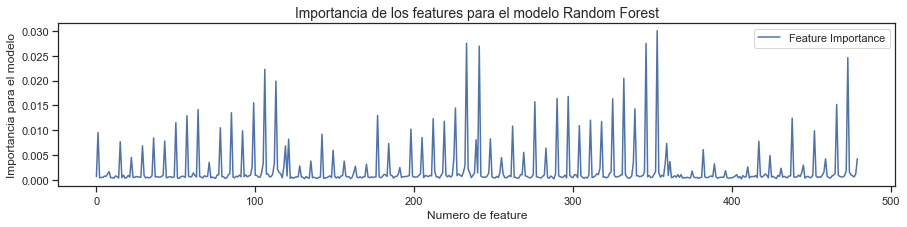

In [74]:
plt.figure(figsize=(15,3))
plt.plot(random_forest_random_search.best_estimator_.feature_importances_, label='Feature Importance',c='b')
plt.title('Importancia de los features para el modelo Random Forest', fontsize=14)
plt.xlabel('Numero de feature')
plt.ylabel('Importancia para el modelo')
plt.legend()
plt.show()

In [75]:
print('La posicion del feature mas importantes es:',np.where(random_forest_random_search.best_estimator_.feature_importances_==random_forest_random_search.best_estimator_.feature_importances_.max()))

La posicion del feature mas importantes es: (array([353], dtype=int64),)


Realizo las predicciones para X_train y X_test

In [76]:
y_pred = random_forest_random_search.predict(X_total)
y_train_pred = random_forest_random_search.predict(X_train_mas_features)
y_test_pred = random_forest_random_search.predict(X_test_mas_features)

In [77]:
print('El tamaño de X_train_mas_features es:',X_train_mas_features.shape)
print('El tamaño de y_train_pred es:',y_train_pred.shape)
print('El tamaño de X_test_mas_features es:',X_test_mas_features.shape)
print('El tamaño de y_test_pred es:',y_test_pred.shape)

El tamaño de X_train_mas_features es: (880, 480)
El tamaño de y_train_pred es: (880,)
El tamaño de X_test_mas_features es: (90, 480)
El tamaño de y_test_pred es: (90,)


Realizo la gráfica para visualizar la serie original y las predicciones en train y test.

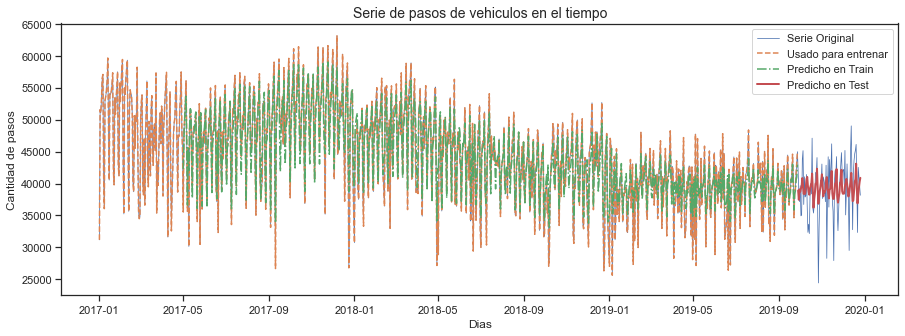

In [78]:
plt.figure(figsize=(15,5))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[:N_train + look_back], senial1[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial1.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred,'-', lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Dias')
plt.ylabel('Cantidad de pasos')
plt.title('Serie de pasos de vehiculos en el tiempo', fontsize=14)
plt.show()

Analizo las métricas RMSE y MAPE para este modelo.

In [79]:
MSE_train_random_forest_4_variables = mean_squared_error(y_train_mas_features, y_train_pred)
print('Error en Train:',np.sqrt(MSE_train_random_forest_4_variables))

MSE_test_random_forest_4_variables = mean_squared_error(y_test_mas_features, y_test_pred)
print('Error en Test:',np.sqrt(MSE_test_random_forest_4_variables))

Error en Train: 2737.6028661674677
Error en Test: 3867.7206808715705


In [80]:
MAPE_test_random_forest_4_variables=mean_absolute_percentage_error(y_test_mas_features,y_test_pred)
print('El porcentaje del error medio absoluto en test es:',MAPE_test_random_forest_4_variables,'%')

El porcentaje del error medio absoluto en test es: 8.14935226050225 %


In [81]:
rmse_train.append(np.sqrt(MSE_train_random_forest_4_variables))
rmse_test.append(np.sqrt(MSE_test_random_forest_4_variables))
mape_test.append(MAPE_test_random_forest_4_variables)
nombre_modelo.append('Random Forest con cuatro series')

## Modelo de Benchmark
**(Modelo simple que predice el valor futuro tomando el valor anterior) **

Utilizo el modelo más básico **predice el valor futuro tomando el valor inmediato anterior** para definir como benchmark y que sea de utilidad para comparar con todos los modelos analizados en este proyecto.

In [82]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [83]:
y_train_pred_0 = y[0]
y_train_pred_benchmark_1 = y[0:N_train - 1]

In [84]:
y_train_pred_benchmark=np.concatenate(([y_train_pred_0.reshape(1,-1),y_train_pred_benchmark_1.reshape(1,-1)]),axis=1)

In [85]:
y_train_pred_benchmark_1.shape

(879,)

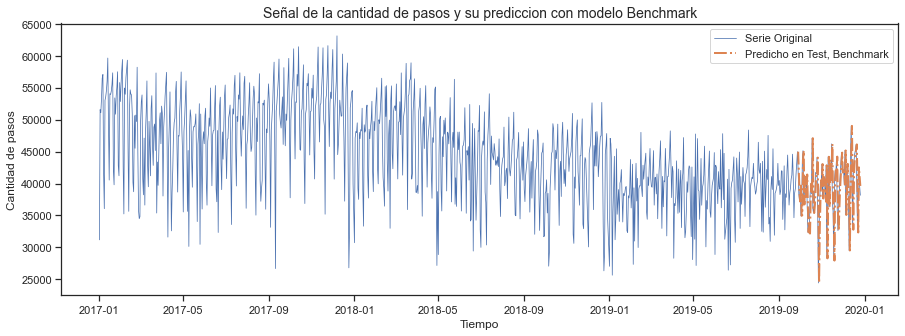

In [86]:
plt.figure(figsize=(15,5))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
#plt.xlim(senial1.index[N_train+look_back], senial1.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Señal de la cantidad de pasos y su prediccion con modelo Benchmark', fontsize=14)
plt.legend()
plt.show()

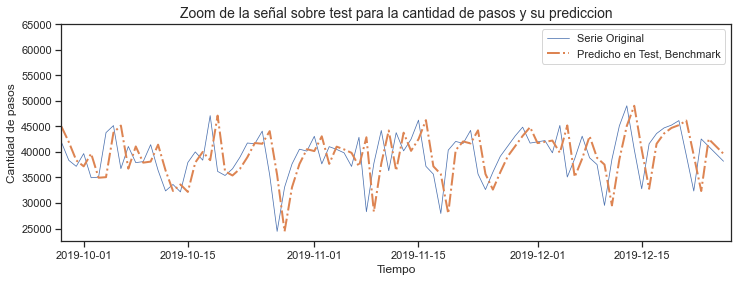

In [87]:
plt.figure(figsize=(12,4))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial1.index[N_train+look_back], senial1.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Zoom de la señal sobre test para la cantidad de pasos y su prediccion', fontsize=14)
plt.legend()
plt.show()

Analizo las métricas RMSE y MAPE para este modelo benchmark

In [88]:
MSE_benchmark_train = mean_squared_error(y_train_mas_features , y_train_pred_benchmark.reshape(-1,1))
print('Error RMSE en train',np.sqrt(MSE_benchmark_train))


y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE_benchmark_test = mean_squared_error(y_test_mas_features, y[-1 + N_train:N_train+N_test - 1])
print('Error RMSE en test',np.sqrt(MSE_benchmark_test))

Error RMSE en train 6873.513390504943
Error RMSE en test 5447.065952146811


In [89]:
MAPE_benchmark=mean_absolute_percentage_error(y_test_mas_features,y_test_pred_benchmark)
print('El porcentaje del error medio absoluto en test es:',MAPE_benchmark,'%')

El porcentaje del error medio absoluto en test es: 11.556290989166676 %


In [90]:
rmse_train.append(np.sqrt(MSE_benchmark_train))
rmse_test.append(np.sqrt(MSE_benchmark_test))
mape_test.append(MAPE_benchmark)
nombre_modelo.append('Benchmark')

## Modelo utilizando librería Prophet

Analizo ahora un modelo con la librería Prophet. Esta está especialmente diseñada para análisis y predicciones con datos de series temporales.

Defino el set de datos de train y test para usar en el modelo.

In [91]:
# Datos para usar con modelo prophet (ds e y)
diario_train.reset_index() \
    .rename(columns={'fecha':'ds',
                     'cantidad_pasos':'y'}).head()

,ds,y,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
0,2017-01-01,31183.0,14132.0,542.0,30641.0,17051.0
1,2017-01-02,51568.0,23743.0,2589.0,48979.0,27825.0
2,2017-01-03,51093.0,23526.0,2771.0,48322.0,27567.0
3,2017-01-04,53332.0,24383.0,2751.0,50581.0,28949.0
4,2017-01-05,56486.0,25666.0,2864.0,53622.0,30820.0


Armo la grilla de parámetros que usare para evaluar y obtener el mejor modelo con hiperparametros optimizados por la metrica MAPE. Calculo la cantidad de combinaciones posibles que me produce la grilla de hiperparametros.

In [92]:
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.3,0.5],
              'n_changepoints' : [100,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1
print('Total de modelos posibles para evaluar:',cnt)

Total de modelos posibles para evaluar: 12


Con el siguiente codigo entreno los modelos con cada combinacion de hiperparametros y evaluo para cada uno el MAPE.

In [93]:
import random
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='AR')
    train_model.fit(diario_train.reset_index() \
              .rename(columns={'fecha':'ds',
                               'cantidad_pasos':'y'}))
    diario_train_fcst = train_model.predict(df=diario_train.reset_index() \
                                            .rename(columns={'fecha':'ds'}))
    diario_test_fcst = train_model.predict(df=diario_test.reset_index() \
                                           .rename(columns={'fecha':'ds'}))
    dif_error_test = np.square(diario_test_fcst.loc[:, 'yhat'] - diario_test.cantidad_pasos.values)
    MSE_prophet_test = np.mean(dif_error_test)
    rmse_test_prophet = np.sqrt(MSE_prophet_test)
    dif_error_train = np.square(diario_train_fcst.loc[:, 'yhat'] - diario_train.cantidad_pasos.values)
    MSE_prophet_train = np.mean(dif_error_train)
    rmse_train_prophet = np.sqrt(MSE_prophet_train)
    MAPE_prophet=mean_absolute_percentage_error(diario_test.cantidad_pasos,diario_test_fcst.yhat)
    print('** Mean Absolute Percentage Error(MAPE) = ',MAPE_prophet,'**','\n')
    model_parameters = model_parameters.append({'MAPE':MAPE_prophet,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
** Mean Absolute Percentage Error(MAPE) =  9.833203387118948 ** 

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
** Mean Absolute Percentage Error(MAPE) =  12.126549699174463 ** 

{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
** Mean Absolute Percentage Error(MAPE) =  9.912746815571545 ** 

{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
** Mean Absolute Percentage Error(MAPE) =  12.048335891775384 ** 

{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
** Mean Absolute Percentage Error(MAPE) =  9.085933506932141 ** 

{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
** Mean Absolute Percentage Error(MAPE) =  10.964298410256182 ** 

{'changepoint_prior_scale': 0.3, 'n_changepoints': 200,

Analizo cual fue la mejor combinacion que hace menor el error MAPE

In [94]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,8.730892,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
1,9.085934,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
2,9.833203,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
3,9.912747,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
4,10.572931,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."


In [95]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.3,
 'n_changepoints': 200,
 'seasonality_mode': 'multiplicative'}

Defino y entreno nuevamente el modelo con los mejores hiperparametros encontrados.

In [96]:
model=Prophet(weekly_seasonality=True, daily_seasonality = False, yearly_seasonality = True,
              interval_width=0.95, changepoint_prior_scale=0.3,n_changepoints=200,
              seasonality_mode='multiplicative')
model.add_country_holidays(country_name='AR')

In [97]:
model.fit(diario_train.reset_index() \
          .rename(columns={'fecha':'ds',
                           'cantidad_pasos':'y'}))

Realizo las predicciones.

In [98]:
#Realizo la prediccion con el modelo sobre el set de train y test
diario_test_fcst = model.predict(df=diario_test.reset_index() \
                                   .rename(columns={'fecha':'ds'}))
diario_train_fcst = model.predict(df=diario_train.reset_index() \
                                   .rename(columns={'fecha':'ds'}))

In [99]:
diario_test_fcst.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice],...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-10-01,39257.718505,32953.181147,48774.451832,39257.211523,39258.590715,0.0,0.0,0.0,0.0,...,0.002898,0.002898,0.002898,0.028657,0.028657,0.028657,0.0,0.0,0.0,40496.495421
1,2019-10-02,39254.646073,33117.248830,50704.573298,39252.596288,39257.048906,0.0,0.0,0.0,0.0,...,0.045429,0.045429,0.045429,0.028108,0.028108,0.028108,0.0,0.0,0.0,42141.314042
2,2019-10-03,39251.573641,34613.546905,51661.616830,39247.786355,39256.102079,0.0,0.0,0.0,0.0,...,0.075911,0.075911,0.075911,0.027644,0.027644,0.027644,0.0,0.0,0.0,43316.267543


Ploteo todos los componentes del modelo.

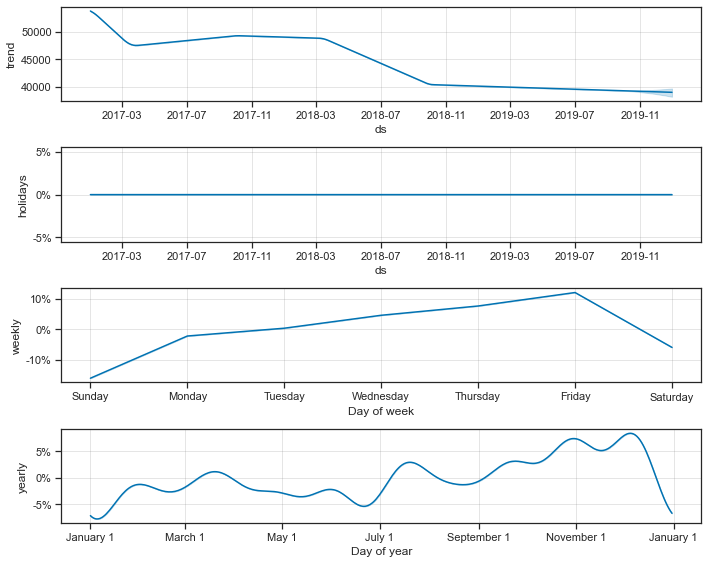

In [100]:
fig = model.plot_components(pd.concat([diario_train_fcst,diario_test_fcst]),figsize=(10,8))

En estas graficas de las componentes del modelo de Prophet, corroboro lo que ya había analizado con anterioridad, una **tendencia decreciente de la serie a medida que transcurren los años** (pasan menos vehículos por Peaje AU Illia con modalidad de pago en Efectivo), también veo que el **día de la semana que más vehículos cruzan la estación de peaje es el Viernes** y que hacia fin de año, en los meses de Noviembre y Diciembre, se da la mayor afluencia de tráfico con la modalidad de **pago en Efectivo**.

Grafico la predicción realizada y los valores de set de test actual

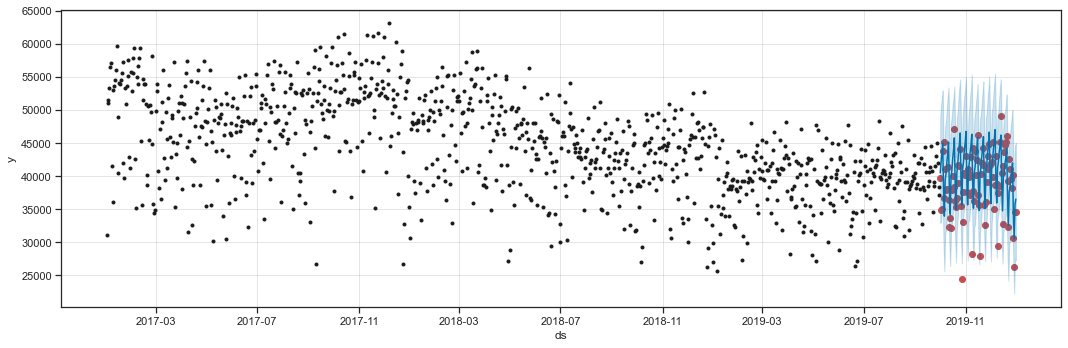

In [101]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(diario_test.index, diario_test['cantidad_pasos'], color='r')
fig = model.plot(diario_test_fcst, ax=ax)

Analizo las métricas RMSE y MAPE con este modelo.

In [102]:
dif_error_test = np.square(diario_test_fcst.loc[:, 'yhat'] - diario_test.cantidad_pasos.values)
MSE_prophet_test = np.mean(dif_error_test)
rmse_test_prophet = np.sqrt(MSE_prophet_test)
dif_error_train = np.square(diario_train_fcst.loc[:, 'yhat'] - diario_train.cantidad_pasos.values)
MSE_prophet_train = np.mean(dif_error_train)
rmse_train_prophet = np.sqrt(MSE_prophet_train)

In [103]:
print('Error RMSE en train',rmse_train_prophet)
print('Error RMSE en test',rmse_test_prophet)

Error RMSE en train 4215.956474828596
Error RMSE en test 4749.980466019725


In [104]:
MAPE_prophet=mean_absolute_percentage_error(diario_test.cantidad_pasos,diario_test_fcst.yhat)
print('El porcentaje de error medio absoluto en test es: ',MAPE_prophet,'%')

El porcentaje de error medio absoluto en test es:  10.031013826384163 %


In [105]:
rmse_train.append(rmse_train_prophet)
rmse_test.append(rmse_test_prophet)
mape_test.append(MAPE_prophet)
nombre_modelo.append('Prophet')

A continuación, voy a evaluar cómo se comporta la metrica MAPE según el horizonte de tiempo a predecir. Es de esperar que este error vaya creciendo a medida que el tiempo de predicción sea más lejano (predicción más a futuro).

In [106]:
df_cv = cross_validation(model, initial='365.25 days', period='30 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2018-01-03 00:00:00 and 2018-09-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-04,48852.030065,41656.493204,57108.586310,47953.0,2018-01-03
1,2018-01-05,50755.174049,42260.925337,58846.949608,49505.0,2018-01-03
2,2018-01-06,41334.515850,33158.567060,49766.293586,39235.0,2018-01-03
3,2018-01-07,35281.597543,27597.728161,42709.860922,37522.0,2018-01-03
4,2018-01-08,43402.438906,35916.565794,51198.593865,48010.0,2018-01-03


In [107]:
df_p = performance_metrics(df_cv)
df_p.head(-1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,2.298357e+07,4794.118585,3590.292985,0.086253,0.059677,0.909589
1,38 days,2.350879e+07,4848.586133,3649.142266,0.087529,0.062090,0.906849
2,39 days,2.378525e+07,4877.012020,3687.931186,0.088310,0.064913,0.906849
3,40 days,2.378550e+07,4877.038456,3696.481512,0.088357,0.066208,0.908219
4,41 days,2.400042e+07,4899.022019,3727.899442,0.089102,0.066079,0.905479
...,...,...,...,...,...,...,...
323,360 days,1.701943e+08,13045.852831,11596.750632,0.298442,0.313441,0.423288
324,361 days,1.707375e+08,13066.654618,11597.130123,0.297637,0.311960,0.423288
325,362 days,1.705711e+08,13060.288477,11574.517496,0.296550,0.310777,0.421918
326,363 days,1.702976e+08,13049.812787,11564.840932,0.296512,0.311960,0.417808


Grafico el comportamiento de la metrica MAPE sobre set de test a medida que crece el horizonte de predicción.

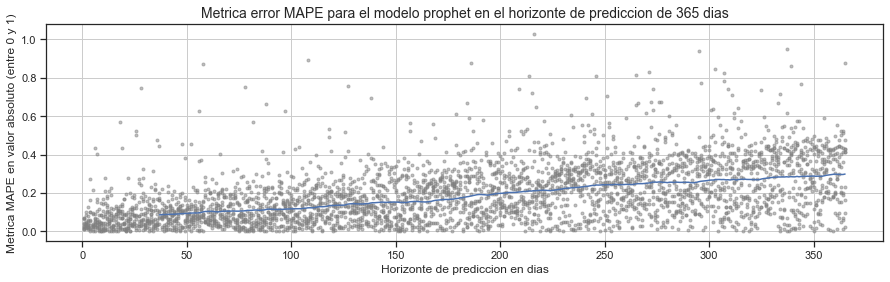

In [108]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',figsize=(15,4))
plt.title('Metrica error MAPE para el modelo prophet en el horizonte de prediccion de 365 dias', fontsize=14)
plt.xlabel('Horizonte de prediccion en dias')
plt.ylabel('Metrica MAPE en valor absoluto (entre 0 y 1)')
plt.show()

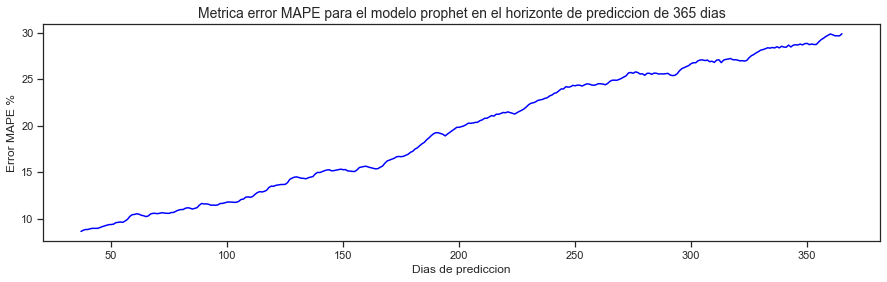

In [109]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(37,df_p.horizon.size+37,1),(df_p.mape*100).values, '-',color='blue',label='Error mape vs. Horizonte de prediccion')
plt.title('Metrica error MAPE para el modelo prophet en el horizonte de prediccion de 365 dias', fontsize=14)
plt.xlabel('Dias de prediccion')
plt.ylabel('Error MAPE %')
plt.show()

### Conclusión

Para evaluar todos los modelos voy a realizar un gráfico que compare sus errores en los set de train y test.

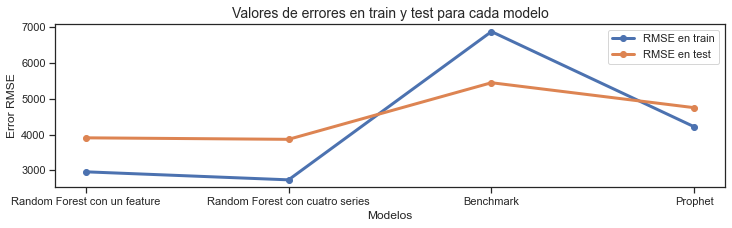

In [110]:
plt.figure(figsize=(12,3))
plt.plot(nombre_modelo,rmse_train, '-o',label='RMSE en train',linewidth=3)
plt.plot(nombre_modelo,rmse_test, '-o',label='RMSE en test',linewidth=3)
plt.xlabel('Modelos')
plt.ylabel('Error RMSE')
plt.title('Valores de errores en train y test para cada modelo', fontsize=14)
plt.legend()
plt.show()

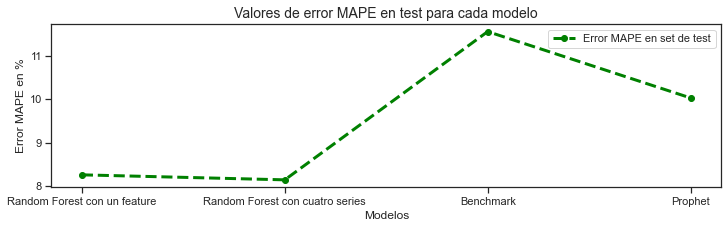

In [111]:
plt.figure(figsize=(12,3))
plt.plot(nombre_modelo,mape_test, '--o',linewidth=3, label='Error MAPE en set de test', color='green')
plt.xlabel('Modelos')
plt.ylabel('Error MAPE en %')
plt.title('Valores de error MAPE en test para cada modelo', fontsize=14)
plt.legend()
plt.show()

Observo que el modelo que mejor performa es el **Random Forest con 1 feature**. Este modelo lo entrene con la serie original cantidad de pasos. El modelo **Random Forest con mas features** entrenado con el desglose de series del dataset (Cantidad de pasos, cantidad vehículos livianos, cantidad vehículos pesados, cantidad vehículos sentido centro) no obtuvo mejoras sustanciales en la performance de prediccion y solo sumo más complejidad y computo a la hora de entrenar. 

Concluyo que haber agregado más información de los distintos features del dataset original no ha sumado relevancia al modelo y no ha cambiado su performance en la predicción (Esta información fue analizada en el apartado de ***Random Forest con mas features***). 

Tambien de este grafico observo que el modelo **Random Forest con 1 feature** tiene similar raiz de error cuadratica media tiene en el set de test que el modelo **Random Forest con mas features**. Ambos modelos tienen una diferencia considerable con el RMSE del set de train y esto me dice que puede haber overfitting en ambos modelos.

Por otro lado el modelo que aparece con menor overfitting es el modelo generado con la libreria Prophet (errores entre train y test más próximos), pero los errores RMSE train y test, son más altos que con ambas versiones de Random Forest.

Por lo dicho analizo hasta aqui, paso a analizar el comportamiento de la metrica MAPE (Error porcentual medio absoluto) sobre el set de test para todos los modelos y observo que los que menor error MAPE tienen son los modelos de Random Forest.

Por lo tanto selecciono como modelo mas performate el **Random Forest con 1 feature** ya que tiene menor requerimiento de computos 

## Predicción para primer mes de este año 2020 con Random Forest.

Ahora realizo la predicción con Multi Step con el modelo Random Forest para el mes de enero de 2020.
Tomo la ultima muestra del set de test para continuar desde alli con la prediccion.

In [112]:
y_ms_test_pred = []
print('El tamaño del set de test es:',X_test_mas_features.shape)
print('La ultima instancia del set de test es la posicion:',X_test_mas_features.shape[0])
print('Los valores de la ultima instancia del set de test son:')
#print(X_test_mas_features [(X_test_mas_features.shape[0]-1),:])
x = X_test_mas_features[X_test_mas_features.shape[0]-1,:] # arrancamos con la ultima instancias del conjunto de test

El tamaño del set de test es: (90, 480)
La ultima instancia del set de test es la posicion: 90
Los valores de la ultima instancia del set de test son:


Con el siguiente código realizare la prediccion de los valores siguientes observando los últimos días del año 2019 para predecir de a uno los valores de 2020

In [113]:
for i in np.arange(1,32,1):
    y_os_pred = random_forest_random_search.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [114]:
dates_m = pd.date_range('20200101', periods=31, freq='D')
df=pd.DataFrame()
df['fecha']=dates_m
df['y']=y_ms_test_pred
print('Tamaño del dataset:',df.shape)
df.head()

Tamaño del dataset: (31, 2)


,fecha,y
0,2020-01-01,40888.128305
1,2020-01-02,42293.119559
2,2020-01-03,39332.170382
3,2020-01-04,36985.053940
4,2020-01-05,38563.109572


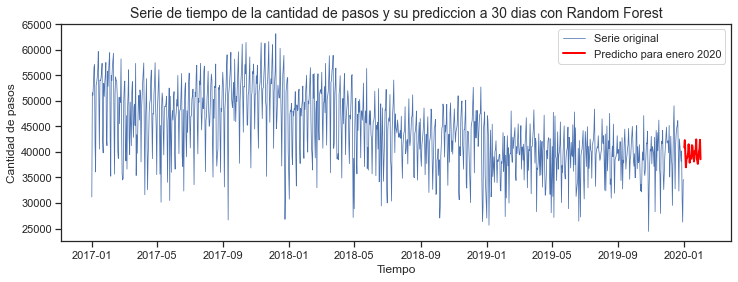

In [115]:
plt.figure(figsize=(12,4))
plt.plot(senial1.index, senial1,lw = 0.75, label = 'Serie original')
plt.plot(df.fecha, df.y,'-', lw = 2, label = 'Predicho para enero 2020', color='red')
#plt.xlim(senial1.index[N_train+look_back], senial1.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Serie de tiempo de la cantidad de pasos y su prediccion a 30 dias con Random Forest', fontsize=14)
plt.legend()
plt.show()

Observo que la predicción con este modelo conserva la variabilidad de las muestras reales en las predichas por el modelo.

Seguido realizo un zoom sobre el mes de prediccion para observar mas en detalle.

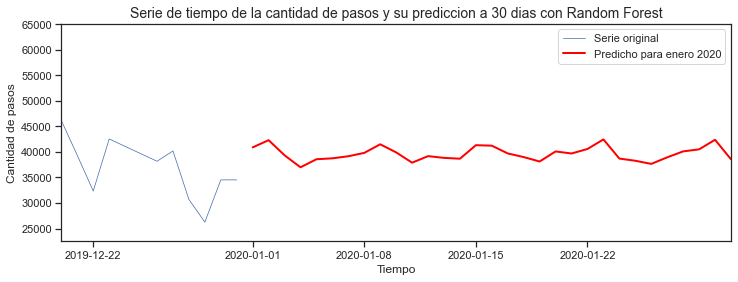

In [116]:
plt.figure(figsize=(12,4))
plt.plot(senial1.index, senial1,lw = 0.75, label = 'Serie original')
plt.plot(df.fecha, df.y,'-', lw = 2, label = 'Predicho para enero 2020', color='red')
plt.xlim('2019-12-20', '2020-01-31')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Serie de tiempo de la cantidad de pasos y su prediccion a 30 dias con Random Forest', fontsize=14)
plt.legend()
plt.show()

Observo que las predicciones no parecen mantener la variabilidad de las muestras del ultimo periodo del set de train. Por consiguiente realizare la prediccion para todo el año y vere como se desempeña el modelo Random Forest.

In [117]:
y_ms_test_pred = []
print('El tamaño del set de test es:',X_test_mas_features.shape)
print('La ultima instancia del set de test es la posicion:',X_test_mas_features.shape[0])
print('Los valores de la ultima instancia del set de test son:')
#print(X_test_mas_features [(X_test_mas_features.shape[0]-1),:])
x = X_test_mas_features[X_test_mas_features.shape[0]-1,:] # arrancamos con la ultima instancias del conjunto de test
for i in np.arange(1,366,1):
    y_os_pred = random_forest_random_search.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

El tamaño del set de test es: (90, 480)
La ultima instancia del set de test es la posicion: 90
Los valores de la ultima instancia del set de test son:


In [118]:
dates_m = pd.date_range('20200101', periods=365, freq='D')
df=pd.DataFrame()
df['fecha']=dates_m
df['y']=y_ms_test_pred
print('Tamaño del dataset:',df.shape)
df.head()

Tamaño del dataset: (365, 2)


,fecha,y
0,2020-01-01,40888.128305
1,2020-01-02,42293.119559
2,2020-01-03,39332.170382
3,2020-01-04,36985.053940
4,2020-01-05,38563.109572


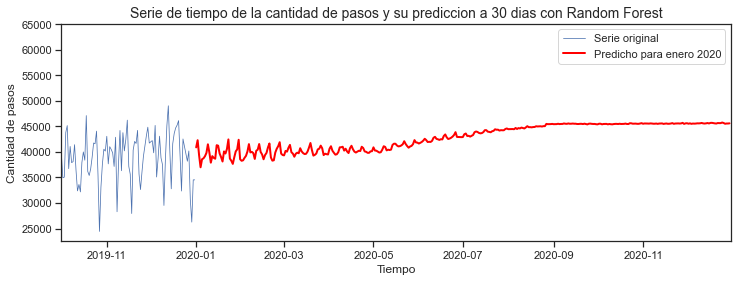

In [119]:
plt.figure(figsize=(12,4))
plt.plot(senial1.index, senial1,lw = 0.75, label = 'Serie original')
plt.plot(df.fecha, df.y,'-', lw = 2, label = 'Predicho para enero 2020', color='red')
plt.xlim('2019-10-01', '2020-12-31')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Serie de tiempo de la cantidad de pasos y su prediccion a 30 dias con Random Forest', fontsize=14)
plt.legend()
plt.show()

Hay que recordar que el método Multi Step lo que va haciendo es tomar las ultimas muestras de 2019 (valores reales del dataset) y predecir el siguiente valor (primera predicción = 01 enero 2020). Luego la ventana se corre un lugar hacia adelante en posición de las muestras e incorpora la muestra predicha 01 enero 2020 como input para realizar la siguiente predicción 02 enero 2020, así hasta que completa el ciclo de predicciones solicitadas. 

El problema que genera este método es que el error que se comete en la predicción se va acumulando ya que las predicciones pasan a ser parte del set de ingreso al modelo para la siguiente predicción. 

**Nota**: Un caso particular que podría suceder es que si, la ventana de muestras que tomo para ingresar al modelo y predecir, es menor que el periodo al que intento llegar a su predicción, en algún momento del proceso la predicción se realizara por completo con los valores obtenidos de predicciones anteriores y esto significaría la máxima acumulación de error. O sea, a más lejana la predicción se comete mayor error en el valor predicho.

## Predicción para este año 2020 con Prophet.

Armo el set de datos para predecir a futuro todo el año 2020.

In [120]:
future = model.make_future_dataframe(periods=432, freq='D')
forecast = model.predict(future)

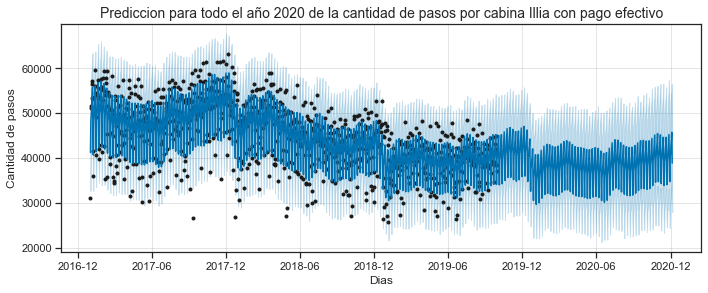

In [121]:
fig = model.plot(forecast,uncertainty=True, plot_cap=False,xlabel='Dias', ylabel='Cantidad de pasos',figsize=(10, 4))
plt.title('Prediccion para todo el año 2020 de la cantidad de pasos por cabina Illia con pago efectivo', fontsize=14)
plt.show()

### Conclusión

En esta última grafica veo que hay un comportamiento en la predicción que tiene una suave pendiente positiva hacia el fin de 2020. En este año tan atípico, que nos toca vivir, la predicción no parece coincidir con la realidad por la pandemia COVID-19. Es evidente que este análisis y modelos no contemplan una situación tan fuera de la logica y tan atípica como la que estamos viviendo y por consiguiente es imposible que un pronóstico acerca de la cantidad de vehículos que pasaron por una cabina de peaje, sea donde sea que se realice este análisis, pueda aproximar predicciones correctas a la realidad por no poseer información en antecedentes con los cuales ajustar las predicciones. 

Por lo expresado, es evidente que el modelo no ajusta a la realidad con su predicción, no contempla las restricciones al tránsito que se dieron desde marzo de 2020 hasta la fecha.

### * **Parte C** - Investigación.
Como investigación quiero proponer diseñar y evaluar un modelo de red neuronal para predecir los valores futuros de la serie. Quisiera, en el proyecto integrador final, plantear un modelo de este tipo y entrenarlo para que realice las predicciones y compararlas contras las obtenidas por los modelos de este proyecto N°3.

Deberé plantear una red neuronal para hacer regresión y que pueda predecir los valores siguientes de la serie al ingresarle los valores actuales. Para esto estuve observando un trabajo publicado por la Universidad de Palermo https://www.palermo.edu/ donde exponen el tema y van desarrollándolo.
**Publicación**: ***Redes neuronales artificiales en predicción de series de tiempo*** (Luis Escobar R, Julio Valdes H y Santiago Zapata C, https://www.palermo.edu/ingenieria/Pdf2010/CyT9/02.pdf)

### Critica a la metodología usada.

Como crítica constructiva podría decir que sería de mucha utilidad tener ciertos check list que sirvan para realizarse ordenadamente preguntas que puedan identificar variables ajenas al problema pero que puedan tener relevancia al ejecutar predicciones. Alguna metodología que ayude a pensar el problema en forma integral, más allá de los datos de las series temporales con las cuales contamos. Una metodología que ayude a analizar restricciones, variables que aparentan ser ajenas al problema pero que pueden tener impacto sobre este. Para este caso puntual de la serie analizada la pandemia de COVID-19 es un hecho totalmente inusual que muy pocas personas o modelos habrán podido advertir y que no se disponen datos históricos como para que puedan ser incluidos en el análisis a fin de precisar mejor las predicciones en un contexto así. Podría llamarse que este año 2020 se encuentra entre los outliers de la historia mundial para muchos análisis de series temporales.

### Publicacion en GitHub.

https://github.com/lhfuccia/proyecto3